# Timeseries Estimation

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import pandas as pd

import warnings
#import multiprocessing as mp
#import dill
import tqdm

import pandas_datareader.data as web
import datetime as dt

import statsmodels.api as sm
import linearmodels as lm

import matplotlib.pyplot as plt
import seaborn as sns

import mypack.data as data
import mypack.calc as calc
import mypack.plot as plot
import mypack.clas as clas

In [3]:
pd.set_option('display.float_format', lambda x: '%.4f' % x) #sets decimals to be displayed

In [4]:
sns.set()
sns.set(rc={'figure.figsize': (17, 6)})

In [5]:
%matplotlib inline

## Data

Data is imported from [Kenneth French's data library](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) and [FRED](https://fred.stlouisfed.org/series/). Currently, this workbook uses 49 industry portfolios and the FF3 factors. Additionally, NBER recession indicators complement the data.

In [6]:
#sample_start = dt.datetime(1962,1,1)
sample_start = dt.datetime(1900,1,1)
sample_end = dt.datetime(2019,5,31)

### Factor data

In [7]:
factors_daily = data.download_factor_data('D')/100
factors_monthly = data.download_factor_data('M')/100

factors_daily = factors_daily.loc[(factors_daily.index >= sample_start) & (factors_daily.index <= sample_end)]
factors_monthly = factors_monthly.loc[(factors_monthly.index >= sample_start) & (factors_monthly.index <= sample_end)]

### Recession data

In [8]:
usrec_daily = data.download_recessions_data('D')
usrec_monthly = data.download_recessions_data('M')

## Estimation
### Setup

In [9]:
# set up destination frame
df_market = factors_daily['Mkt-RF'].to_frame()
df_market.columns = pd.MultiIndex.from_tuples([('raw_data','return')])

In [9]:
df_market = pd.read_pickle('df_market.pkl')

### Moments

#### 1 yr

In [11]:
win_yrs = 1
moment_name = 'moment_'+str(win_yrs)

In [12]:
# This dictionary contains the mapping of data variables to model outputs for the OLS CAPM models
mom_dict = {'mean': 'y.mean()',
                'std': 'y.std()',
                'var': 'y.var()',
                'skew': 'y.skew()',
                'exkurt': 'y.kurtosis()',
            }

if False:
    # Add data columns to dataframe
    df_market = df_market.join(pd.DataFrame(np.nan, columns=pd.MultiIndex.from_product([[moment_name], mom_dict.keys()]), index=df_market.index))

In [13]:
%%time
# set up indices
ind_dates = df_market[(df_market[('raw_data','return')].notna())].index.get_level_values(0)
opt_dates = ind_dates[ind_dates>ind_dates[0].replace(year=ind_dates[0].year+win_yrs)]
    
for iDate in tqdm.tqdm(opt_dates):
        
    # select data
    window = ind_dates[(ind_dates>[iDate+dt.timedelta(1) if (iDate.day==29)&(iDate.month==2) else iDate][0].replace(year=iDate.year-win_yrs)) & (ind_dates<=iDate)]
    y = df_market.loc[(window),('raw_data','return')]
        
    # estimate & save moments
    for iEntry in mom_dict.keys():
        df_market.at[(iDate),(moment_name, iEntry)] = eval(mom_dict[iEntry])
            
#df_market.to_pickle('df_market.pkl')

100%|███████████████████████████████████████████████████████████████████████████| 24245/24245 [00:54<00:00, 442.30it/s]


Wall time: 54.8 s


#### 5 yrs

In [29]:
win_yrs = 5
moment_name = 'moment_'+str(win_yrs)

In [30]:
# This dictionary contains the mapping of data variables to model outputs for the OLS CAPM models
mom_dict = {'mean': 'y.mean()',
                'std': 'y.std()',
                'var': 'y.var()',
                'skew': 'y.skew()',
                'exkurt': 'y.kurtosis()',
            }

if False:
    # Add data columns to dataframe
    df_market = df_market.join(pd.DataFrame(np.nan, columns=pd.MultiIndex.from_product([[moment_name], mom_dict.keys()]), index=df_market.index))

In [31]:
%%time
# set up indices
ind_dates = df_market[(df_market[('raw_data','return')].notna())].index.get_level_values(0)
opt_dates = ind_dates[ind_dates>ind_dates[0].replace(year=ind_dates[0].year+win_yrs)]
    
for iDate in tqdm.tqdm(opt_dates):
        
    # select data
    window = ind_dates[(ind_dates>[iDate+dt.timedelta(1) if (iDate.day==29)&(iDate.month==2) else iDate][0].replace(year=iDate.year-win_yrs)) & (ind_dates<=iDate)]
    y = df_market.loc[(window),('raw_data','return')]
        
    # estimate & save moments
    for iEntry in mom_dict.keys():
        df_market.at[(iDate),(moment_name, iEntry)] = eval(mom_dict[iEntry])
            
#df_market.to_pickle('df_market.pkl')

100%|███████████████████████████████████████████████████████████████████████████| 23245/23245 [01:13<00:00, 316.80it/s]


Wall time: 1min 13s


#### 10 yrs

In [84]:
win_yrs = 10
moment_name = 'moment_'+str(win_yrs)

In [85]:
# This dictionary contains the mapping of data variables to model outputs for the OLS CAPM models
mom_dict = {'mean': 'y.mean()',
                'std': 'y.std()',
                'var': 'y.var()',
                'skew': 'y.skew()',
                'exkurt': 'y.kurtosis()',
            }

if False:
    # Add data columns to dataframe
    df_market = df_market.join(pd.DataFrame(np.nan, columns=pd.MultiIndex.from_product([[moment_name], mom_dict.keys()]), index=df_market.index))

In [86]:
%%time
# set up indices
ind_dates = df_market[(df_market[('raw_data','return')].notna())].index.get_level_values(0)
opt_dates = ind_dates[ind_dates>ind_dates[0].replace(year=ind_dates[0].year+win_yrs)]
    
for iDate in tqdm.tqdm(opt_dates):
        
    # select data
    window = ind_dates[(ind_dates>[iDate+dt.timedelta(1) if (iDate.day==29)&(iDate.month==2) else iDate][0].replace(year=iDate.year-win_yrs)) & (ind_dates<=iDate)]
    y = df_market.loc[(window),('raw_data','return')]
        
    # estimate & save moments
    for iEntry in mom_dict.keys():
        df_market.at[(iDate),(moment_name, iEntry)] = eval(mom_dict[iEntry])
            
#df_market.to_pickle('df_market.pkl')

100%|███████████████████████████████████████████████████████████████████████████| 21995/21995 [02:16<00:00, 160.61it/s]


Wall time: 2min 16s


#### 20 yrs

In [10]:
win_yrs = 20
moment_name = 'moment_'+str(win_yrs)

In [11]:
# This dictionary contains the mapping of data variables to model outputs for the OLS CAPM models
mom_dict = {'mean': 'y.mean()',
                'std': 'y.std()',
                'var': 'y.var()',
                'skew': 'y.skew()',
                'exkurt': 'y.kurtosis()',
            }

if False:
    # Add data columns to dataframe
    df_market = df_market.join(pd.DataFrame(np.nan, columns=pd.MultiIndex.from_product([[moment_name], mom_dict.keys()]), index=df_market.index))

In [12]:
%%time
# set up indices
ind_dates = df_market[(df_market[('raw_data','return')].notna())].index.get_level_values(0)
opt_dates = ind_dates[ind_dates>ind_dates[0].replace(year=ind_dates[0].year+win_yrs)]
    
for iDate in tqdm.tqdm(opt_dates):
        
    # select data
    window = ind_dates[(ind_dates>[iDate+dt.timedelta(1) if (iDate.day==29)&(iDate.month==2) else iDate][0].replace(year=iDate.year-win_yrs)) & (ind_dates<=iDate)]
    y = df_market.loc[(window),('raw_data','return')]
        
    # estimate & save moments
    for iEntry in mom_dict.keys():
        df_market.at[(iDate),(moment_name, iEntry)] = eval(mom_dict[iEntry])
            
#df_market.to_pickle('df_market.pkl')

100%|████████████████████████████████████████████████████████████████████████████| 18537/18537 [03:09<00:00, 98.01it/s]


Wall time: 3min 9s


### HMM: mmss 1yr

Choices:
* algorithm
* starting values
* window length
* treatment of outliers
* number of states

In [14]:
win_yrs = 1
moment_name = 'moment_'+str(win_yrs)
hmm_name = 'HMM_mmss_'+str(win_yrs)

In [15]:
# This dictionary contains the mapping of data variables to model outputs for the unrestricted HMM models
hmm_dict = {'convergence': 'str(hmm_model.mle_retvals[\'converged\'])',
                'likelihood': 'hmm_model.llf',
                'aic': 'hmm_model.aic',
                'bic': 'hmm_model.bic',
                'mu_0': 'hmm_model.params[\'const[0]\']',
                'mu_1': 'hmm_model.params[\'const[1]\']',
                'sigma2_0': 'hmm_model.params[\'sigma2[0]\']',
                'sigma2_1': 'hmm_model.params[\'sigma2[1]\']',
                'p00': 'hmm_model.params[\'p[0->0]\']',
                'p10': 'hmm_model.params[\'p[1->0]\']',
                'mu_0_se': 'hmm_model.bse[\'const[0]\']',
                'mu_1_se': 'hmm_model.bse[\'const[1]\']',
                'sigma2_0_se': 'hmm_model.bse[\'sigma2[0]\']',
                'sigma2_1_se': 'hmm_model.bse[\'sigma2[1]\']',
                'p00_se': 'hmm_model.bse[\'p[0->0]\']',
                'p10_se': 'hmm_model.bse[\'p[1->0]\']',
                'mu_cov': 'hmm_model.cov_params()[\'const[0]\'][\'const[1]\']',
                'sigma2_cov': 'hmm_model.cov_params()[\'sigma2[0]\'][\'sigma2[1]\']',
                'prob_cov': 'hmm_model.cov_params()[\'p[0->0]\'][\'p[1->0]\']',
                'smooth_prob_0': 'hmm_model.smoothed_marginal_probabilities.iloc[-1,0]',
                'smooth_prob_1': 'hmm_model.smoothed_marginal_probabilities.iloc[-1,1]',
                'filt_prob_0': 'hmm_model.filtered_marginal_probabilities.iloc[-1,0]',
                'filt_prob_1': 'hmm_model.filtered_marginal_probabilities.iloc[-1,1]',
                'mean_smooth_prob_0': 'hmm_model.smoothed_marginal_probabilities.iloc[:,0].mean()',
                'mean_smooth_prob_1': 'hmm_model.smoothed_marginal_probabilities.iloc[:,1].mean()',
                'mean_filt_prob_0': 'hmm_model.filtered_marginal_probabilities.iloc[:,0].mean()',
                'mean_filt_prob_1': 'hmm_model.filtered_marginal_probabilities.iloc[:,1].mean()',
                'smooth_prob_innov': 'abs(hmm_model.smoothed_marginal_probabilities.iloc[-1,0]-hmm_model.smoothed_marginal_probabilities.iloc[-2,0])',
                'filt_prob_innov': 'abs(hmm_model.filtered_marginal_probabilities.iloc[-1,0]-hmm_model.filtered_marginal_probabilities.iloc[-2,0])',
                'nobs': 'hmm_model.nobs',
                'algorithm': 'algo',
            }

if False:
    # Add data columns to dataframe
    df_market = df_market.join(pd.DataFrame(np.nan, columns=pd.MultiIndex.from_product([[hmm_name], hmm_dict.keys()]), index=df_market.index))
    df_market[(hmm_name,'convergence')] = df_market[(hmm_name,'convergence')].astype(object)
    df_market[(hmm_name,'algorithm')] = df_market[(hmm_name,'algorithm')].astype(object)

In [16]:
%%time

count = 0

ind_dates = df_market[(df_market[('raw_data','return')].notna())].index.get_level_values(0)
opt_dates = ind_dates[ind_dates>ind_dates[0].replace(year=ind_dates[0].year+win_yrs)]
for iDate in tqdm.tqdm(opt_dates):
    
    # look up moment estimates for the period
    (m,s) = (df_market.at[(iDate),(moment_name, 'mean')],df_market.at[(iDate),(moment_name, 'std')])
    
    # select data & treat outliers
    window = ind_dates[(ind_dates>[iDate+dt.timedelta(1) if (iDate.day==29)&(iDate.month==2) else iDate][0].replace(year=iDate.year-win_yrs)) & (ind_dates<=iDate)]
    y = df_market.loc[(window),('raw_data','return')]
    y[y<m-2.325*s] = m-2.325*s + 0.1*(y[y<m-2.325*s]-(m-2.325*s))
    y[y>m+2.325*s] = m+2.325*s + 0.1*(y[y<m-2.325*s]-(m+2.325*s))
    
    # set initial guesses for parameters
    m,s = y.mean(),y.std()
    win_init = [0.9,0.1] + [m] + [m] + [(2*s)**2] + [(0.5*s)**2]
    
    # initialise first optimisation
    if (iDate==opt_dates[0]):
        with warnings.catch_warnings():
            warnings.filterwarnings(action="ignore")
            for i in range(0,50): #run 50 iterations on the first data window to ensure first estimate is accurate
                hmm_model = sm.tsa.MarkovRegression(y, k_regimes=2, exog=None, switching_trend=True, switching_exog=False, switching_variance=True, missing='drop')\
                    .fit(cov_type='robust', start_params=win_init, method='ncg', disp=False)
                win_init = hmm_model.params
                if i is 49:
                    hmm_init = win_init
                
    # make state 0 the high volatility state & adjust starting values
    if hmm_model.params['sigma2[0]']<hmm_model.params['sigma2[1]']:
        hmm_init = [1-hmm_init[1], 1-hmm_init[0], hmm_init[2], hmm_init[3], hmm_init[5], hmm_init[4]]
    init = np.asarray(hmm_init)
    if (min(init[0],1-init[0])<0.01) | (min(init[1],1-init[1])<0.01):
        init = 0.9*np.asarray(hmm_init) + 0.1*np.asarray(win_init)
        count += 1

    # estimate & save HMM
    for algo in ['ncg','bfgs','powell','cg','newton']:
        with warnings.catch_warnings():
            warnings.filterwarnings(action="ignore")
            hmm_model = sm.tsa.MarkovRegression(y, k_regimes=2, exog=None, switching_trend=True, switching_exog=False, switching_variance=True, missing='drop')\
                    .fit(cov_type='robust', start_params=init, method=algo, disp=False)
        if (not any(hmm_model.params.isna())):
            hmm_init = hmm_model.params
            for iEntry in hmm_dict.keys():
                df_market.at[(iDate),(hmm_name, iEntry)] = eval(hmm_dict[iEntry])
            break

df_market.to_pickle('df_market.pkl')

100%|████████████████████████████████████████████████████████████████████████████| 24245/24245 [56:04<00:00,  7.81it/s]


Wall time: 56min 4s


### HMM: mmss 5yrs

In [76]:
win_yrs = 5
moment_name = 'moment_'+str(win_yrs)
hmm_name = 'HMM_mmss_'+str(win_yrs)

In [77]:
# This dictionary contains the mapping of data variables to model outputs for the unrestricted HMM models
hmm_dict = {'convergence': 'str(hmm_model.mle_retvals[\'converged\'])',
                'likelihood': 'hmm_model.llf',
                'aic': 'hmm_model.aic',
                'bic': 'hmm_model.bic',
                'mu_0': 'hmm_model.params[\'const[0]\']',
                'mu_1': 'hmm_model.params[\'const[1]\']',
                'sigma2_0': 'hmm_model.params[\'sigma2[0]\']',
                'sigma2_1': 'hmm_model.params[\'sigma2[1]\']',
                'p00': 'hmm_model.params[\'p[0->0]\']',
                'p10': 'hmm_model.params[\'p[1->0]\']',
                'mu_0_se': 'hmm_model.bse[\'const[0]\']',
                'mu_1_se': 'hmm_model.bse[\'const[1]\']',
                'sigma2_0_se': 'hmm_model.bse[\'sigma2[0]\']',
                'sigma2_1_se': 'hmm_model.bse[\'sigma2[1]\']',
                'p00_se': 'hmm_model.bse[\'p[0->0]\']',
                'p10_se': 'hmm_model.bse[\'p[1->0]\']',
                'mu_cov': 'hmm_model.cov_params()[\'const[0]\'][\'const[1]\']',
                'sigma2_cov': 'hmm_model.cov_params()[\'sigma2[0]\'][\'sigma2[1]\']',
                'prob_cov': 'hmm_model.cov_params()[\'p[0->0]\'][\'p[1->0]\']',
                'smooth_prob_0': 'hmm_model.smoothed_marginal_probabilities.iloc[-1,0]',
                'smooth_prob_1': 'hmm_model.smoothed_marginal_probabilities.iloc[-1,1]',
                'filt_prob_0': 'hmm_model.filtered_marginal_probabilities.iloc[-1,0]',
                'filt_prob_1': 'hmm_model.filtered_marginal_probabilities.iloc[-1,1]',
                'mean_smooth_prob_0': 'hmm_model.smoothed_marginal_probabilities.iloc[:,0].mean()',
                'mean_smooth_prob_1': 'hmm_model.smoothed_marginal_probabilities.iloc[:,1].mean()',
                'mean_filt_prob_0': 'hmm_model.filtered_marginal_probabilities.iloc[:,0].mean()',
                'mean_filt_prob_1': 'hmm_model.filtered_marginal_probabilities.iloc[:,1].mean()',
                'smooth_prob_innov': 'abs(hmm_model.smoothed_marginal_probabilities.iloc[-1,0]-hmm_model.smoothed_marginal_probabilities.iloc[-2,0])',
                'filt_prob_innov': 'abs(hmm_model.filtered_marginal_probabilities.iloc[-1,0]-hmm_model.filtered_marginal_probabilities.iloc[-2,0])',
                'nobs': 'hmm_model.nobs',
                'algorithm': 'algo',
            }

if False:
    # Add data columns to dataframe
    df_market = df_market.join(pd.DataFrame(np.nan, columns=pd.MultiIndex.from_product([[hmm_name], hmm_dict.keys()]), index=df_market.index))
    df_market[(hmm_name,'convergence')] = df_market[(hmm_name,'convergence')].astype(object)
    df_market[(hmm_name,'algorithm')] = df_market[(hmm_name,'algorithm')].astype(object)

In [79]:
%%time

count = 0

ind_dates = df_market[(df_market[('raw_data','return')].notna())].index.get_level_values(0)
opt_dates = ind_dates[ind_dates>ind_dates[0].replace(year=ind_dates[0].year+win_yrs)]
for iDate in tqdm.tqdm(opt_dates):
    
    # look up moment estimates for the period & set initial guesses for parameters
    (m,s) = (df_market.at[(iDate),(moment_name, 'mean')],df_market.at[(iDate),(moment_name, 'std')])
    
    # select data & winsorise
    window = ind_dates[(ind_dates>[iDate+dt.timedelta(1) if (iDate.day==29)&(iDate.month==2) else iDate][0].replace(year=iDate.year-win_yrs)) & (ind_dates<=iDate)]
    y = df_market.loc[(window),('raw_data','return')]
    y[y<m-2.325*s] = m-2.325*s + 0.1*(y[y<m-2.325*s]-(m-2.325*s))
    y[y>m+2.325*s] = m+2.325*s + 0.1*(y[y<m-2.325*s]-(m+2.325*s))
    
    # set initial guesses for parameters
    m,s = y.mean(),y.std()
    win_init = [0.9,0.1] + [m] + [m] + [(2*s)**2] + [(0.5*s)**2]
    
    # initialise first optimisation
    if (iDate==opt_dates[0]):        
        with warnings.catch_warnings():
            warnings.filterwarnings(action="ignore")
            for i in range(0,50): #run 50 iterations on the first data window to ensure convergence
                hmm_model = sm.tsa.MarkovRegression(y, k_regimes=2, exog=None, switching_trend=True, switching_exog=False, switching_variance=True, missing='drop')\
                    .fit(cov_type='robust', start_params=win_init, method='ncg', disp=False)
                win_init = hmm_model.params
                if i is 49:
                    hmm_init = win_init
                
    # make state 0 the high volatility state & adjust starting values
    if hmm_model.params['sigma2[0]']<hmm_model.params['sigma2[1]']:
        hmm_init = [1-hmm_init[1],1-hmm_init[0],hmm_init[3],hmm_init[2],hmm_init[5],hmm_init[4]]
    init = np.asarray(hmm_init)
    if (min(init[0],1-init[0])<0.01) | (min(init[1],1-init[1])<0.01):
        init = 0.9*np.asarray(hmm_init) + 0.1*np.asarray(win_init)
        count += 1
        
    # eliminate outliers
    low_bound = min(init[2]-1.96*init[4]**0.5, init[3]-1.96*init[5]**0.5)
    up_bound = max(init[2]+1.96*init[4]**0.5, init[3]+1.96*init[5]**0.5)
    y[y<low_bound] = low_bound
    y[y>up_bound] = up_bound
    
    # estimate & save HMM
    for algo in ['ncg','powell','bfgs','cg','newton']:
        with warnings.catch_warnings():
            warnings.filterwarnings(action="ignore")
            hmm_model = sm.tsa.MarkovRegression(y, k_regimes=2, exog=None, switching_trend=True, switching_exog=False, switching_variance=True, missing='drop')\
                    .fit(cov_type='robust', start_params=init, method=algo, disp=False)
        if (not any(hmm_model.params.isna())):
            hmm_init = hmm_model.params
            for iEntry in hmm_dict.keys():
                df_market.at[(iDate),(hmm_name, iEntry)] = eval(hmm_dict[iEntry])
            break
    
#df_market.to_pickle('df_market.pkl')

100%|██████████████████████████████████████████████████████████████████████████| 23245/23245 [2:15:46<00:00,  3.75it/s]


Wall time: 2h 15min 46s


### HMM: mmss 10yrs

In [81]:
win_yrs = 10
moment_name = 'moment_'+str(win_yrs)
hmm_name = 'HMM_mmss_'+str(win_yrs)

In [82]:
# This dictionary contains the mapping of data variables to model outputs for the unrestricted HMM models
hmm_dict = {'convergence': 'str(hmm_model.mle_retvals[\'converged\'])',
                'likelihood': 'hmm_model.llf',
                'aic': 'hmm_model.aic',
                'bic': 'hmm_model.bic',
                'mu_0': 'hmm_model.params[\'const[0]\']',
                'mu_1': 'hmm_model.params[\'const[1]\']',
                'sigma2_0': 'hmm_model.params[\'sigma2[0]\']',
                'sigma2_1': 'hmm_model.params[\'sigma2[1]\']',
                'p00': 'hmm_model.params[\'p[0->0]\']',
                'p10': 'hmm_model.params[\'p[1->0]\']',
                'mu_0_se': 'hmm_model.bse[\'const[0]\']',
                'mu_1_se': 'hmm_model.bse[\'const[1]\']',
                'sigma2_0_se': 'hmm_model.bse[\'sigma2[0]\']',
                'sigma2_1_se': 'hmm_model.bse[\'sigma2[1]\']',
                'p00_se': 'hmm_model.bse[\'p[0->0]\']',
                'p10_se': 'hmm_model.bse[\'p[1->0]\']',
                'mu_cov': 'hmm_model.cov_params()[\'const[0]\'][\'const[1]\']',
                'sigma2_cov': 'hmm_model.cov_params()[\'sigma2[0]\'][\'sigma2[1]\']',
                'prob_cov': 'hmm_model.cov_params()[\'p[0->0]\'][\'p[1->0]\']',
                'smooth_prob_0': 'hmm_model.smoothed_marginal_probabilities.iloc[-1,0]',
                'smooth_prob_1': 'hmm_model.smoothed_marginal_probabilities.iloc[-1,1]',
                'filt_prob_0': 'hmm_model.filtered_marginal_probabilities.iloc[-1,0]',
                'filt_prob_1': 'hmm_model.filtered_marginal_probabilities.iloc[-1,1]',
                'mean_smooth_prob_0': 'hmm_model.smoothed_marginal_probabilities.iloc[:,0].mean()',
                'mean_smooth_prob_1': 'hmm_model.smoothed_marginal_probabilities.iloc[:,1].mean()',
                'mean_filt_prob_0': 'hmm_model.filtered_marginal_probabilities.iloc[:,0].mean()',
                'mean_filt_prob_1': 'hmm_model.filtered_marginal_probabilities.iloc[:,1].mean()',
                'smooth_prob_innov': 'abs(hmm_model.smoothed_marginal_probabilities.iloc[-1,0]-hmm_model.smoothed_marginal_probabilities.iloc[-2,0])',
                'filt_prob_innov': 'abs(hmm_model.filtered_marginal_probabilities.iloc[-1,0]-hmm_model.filtered_marginal_probabilities.iloc[-2,0])',
                'nobs': 'hmm_model.nobs',
                'algorithm': 'algo',
            }

if False:
    # Add data columns to dataframe
    df_market = df_market.join(pd.DataFrame(np.nan, columns=pd.MultiIndex.from_product([[hmm_name], hmm_dict.keys()]), index=df_market.index))
    df_market[(hmm_name,'convergence')] = df_market[(hmm_name,'convergence')].astype(object)
    df_market[(hmm_name,'algorithm')] = df_market[(hmm_name,'algorithm')].astype(object)

In [87]:
%%time

count = 0

ind_dates = df_market[(df_market[('raw_data','return')].notna())].index.get_level_values(0)
opt_dates = ind_dates[ind_dates>ind_dates[0].replace(year=ind_dates[0].year+win_yrs)]
for iDate in tqdm.tqdm(opt_dates):
    
    # look up moment estimates for the period & set initial guesses for parameters
    (m,s) = (df_market.at[(iDate),(moment_name, 'mean')],df_market.at[(iDate),(moment_name, 'std')])
    
    # select data & winsorise
    window = ind_dates[(ind_dates>[iDate+dt.timedelta(1) if (iDate.day==29)&(iDate.month==2) else iDate][0].replace(year=iDate.year-win_yrs)) & (ind_dates<=iDate)]
    y = df_market.loc[(window),('raw_data','return')]
    y[y<m-2.325*s] = m-2.325*s + 0.1*(y[y<m-2.325*s]-(m-2.325*s))
    y[y>m+2.325*s] = m+2.325*s + 0.1*(y[y<m-2.325*s]-(m+2.325*s))
    
    # set initial guesses for parameters
    m,s = y.mean(),y.std()
    win_init = [0.9,0.1] + [m] + [m] + [(2*s)**2] + [(0.5*s)**2]
    
    # initialise first optimisation
    if (iDate==opt_dates[0]):        
        with warnings.catch_warnings():
            warnings.filterwarnings(action="ignore")
            for i in range(0,50): #run 50 iterations on the first data window to ensure convergence
                hmm_model = sm.tsa.MarkovRegression(y, k_regimes=2, exog=None, switching_trend=True, switching_exog=False, switching_variance=True, missing='drop')\
                    .fit(cov_type='robust', start_params=win_init, method='ncg', disp=False)
                win_init = hmm_model.params
                if i is 49:
                    hmm_init = win_init
                
    # make state 0 the high volatility state & adjust starting values
    if hmm_model.params['sigma2[0]']<hmm_model.params['sigma2[1]']:
        hmm_init = [1-hmm_init[1],1-hmm_init[0],hmm_init[3],hmm_init[2],hmm_init[5],hmm_init[4]]
    init = np.asarray(hmm_init)
    if (min(init[0],1-init[0])<0.01) | (min(init[1],1-init[1])<0.01):
        init = 0.9*np.asarray(hmm_init) + 0.1*np.asarray(win_init)
        count += 1
        
    # eliminate outliers
    low_bound = min(init[2]-1.96*init[4]**0.5, init[3]-1.96*init[5]**0.5)
    up_bound = max(init[2]+1.96*init[4]**0.5, init[3]+1.96*init[5]**0.5)
    y[y<low_bound] = low_bound
    y[y>up_bound] = up_bound
    
    # estimate & save HMM
    for algo in ['ncg','powell','bfgs','cg','newton']:
        with warnings.catch_warnings():
            warnings.filterwarnings(action="ignore")
            hmm_model = sm.tsa.MarkovRegression(y, k_regimes=2, exog=None, switching_trend=True, switching_exog=False, switching_variance=True, missing='drop')\
                    .fit(cov_type='robust', start_params=init, method=algo, disp=False)
        if (not any(hmm_model.params.isna())):
            hmm_init = hmm_model.params
            for iEntry in hmm_dict.keys():
                df_market.at[(iDate),(hmm_name, iEntry)] = eval(hmm_dict[iEntry])
            break
    
#df_market.to_pickle('df_market.pkl')

100%|█████████████████████████████████████████████████████████████████████████| 21995/21995 [19:38:24<00:00,  2.12it/s]


Wall time: 19h 38min 24s


### HMM: mmss 20yrs

In [8]:
win_yrs = 20
moment_name = 'moment_'+str(win_yrs)
hmm_name = 'HMM_mmss_'+str(win_yrs)

In [9]:
# This dictionary contains the mapping of data variables to model outputs for the unrestricted HMM models
hmm_dict = {'convergence': 'str(hmm_model.mle_retvals[\'converged\'])',
                'likelihood': 'hmm_model.llf',
                'aic': 'hmm_model.aic',
                'bic': 'hmm_model.bic',
                'mu_0': 'hmm_model.params[\'const[0]\']',
                'mu_1': 'hmm_model.params[\'const[1]\']',
                'sigma2_0': 'hmm_model.params[\'sigma2[0]\']',
                'sigma2_1': 'hmm_model.params[\'sigma2[1]\']',
                'p00': 'hmm_model.params[\'p[0->0]\']',
                'p10': 'hmm_model.params[\'p[1->0]\']',
                'mu_0_se': 'hmm_model.bse[\'const[0]\']',
                'mu_1_se': 'hmm_model.bse[\'const[1]\']',
                'sigma2_0_se': 'hmm_model.bse[\'sigma2[0]\']',
                'sigma2_1_se': 'hmm_model.bse[\'sigma2[1]\']',
                'p00_se': 'hmm_model.bse[\'p[0->0]\']',
                'p10_se': 'hmm_model.bse[\'p[1->0]\']',
                'mu_cov': 'hmm_model.cov_params()[\'const[0]\'][\'const[1]\']',
                'sigma2_cov': 'hmm_model.cov_params()[\'sigma2[0]\'][\'sigma2[1]\']',
                'prob_cov': 'hmm_model.cov_params()[\'p[0->0]\'][\'p[1->0]\']',
                'smooth_prob_0': 'hmm_model.smoothed_marginal_probabilities.iloc[-1,0]',
                'smooth_prob_1': 'hmm_model.smoothed_marginal_probabilities.iloc[-1,1]',
                'filt_prob_0': 'hmm_model.filtered_marginal_probabilities.iloc[-1,0]',
                'filt_prob_1': 'hmm_model.filtered_marginal_probabilities.iloc[-1,1]',
                'mean_smooth_prob_0': 'hmm_model.smoothed_marginal_probabilities.iloc[:,0].mean()',
                'mean_smooth_prob_1': 'hmm_model.smoothed_marginal_probabilities.iloc[:,1].mean()',
                'mean_filt_prob_0': 'hmm_model.filtered_marginal_probabilities.iloc[:,0].mean()',
                'mean_filt_prob_1': 'hmm_model.filtered_marginal_probabilities.iloc[:,1].mean()',
                'smooth_prob_innov': 'abs(hmm_model.smoothed_marginal_probabilities.iloc[-1,0]-hmm_model.smoothed_marginal_probabilities.iloc[-2,0])',
                'filt_prob_innov': 'abs(hmm_model.filtered_marginal_probabilities.iloc[-1,0]-hmm_model.filtered_marginal_probabilities.iloc[-2,0])',
                'nobs': 'hmm_model.nobs',
                'algorithm': 'algo',
            }

if False:
    # Add data columns to dataframe
    df_market = df_market.join(pd.DataFrame(np.nan, columns=pd.MultiIndex.from_product([[hmm_name], hmm_dict.keys()]), index=df_market.index))
    df_market[(hmm_name,'convergence')] = df_market[(hmm_name,'convergence')].astype(object)
    df_market[(hmm_name,'algorithm')] = df_market[(hmm_name,'algorithm')].astype(object)

In [57]:
%%time

count = 0

ind_dates = df_market[(df_market[('raw_data','return')].notna())].index.get_level_values(0)
opt_dates = ind_dates[ind_dates>ind_dates[0].replace(year=ind_dates[0].year+win_yrs)]
for iDate in tqdm.tqdm(opt_dates):
    
    # look up moment estimates for the period & set initial guesses for parameters
    (m,s) = (df_market.at[(iDate),(moment_name, 'mean')],df_market.at[(iDate),(moment_name, 'std')])
    
    # select data & winsorise
    window = ind_dates[(ind_dates>[iDate+dt.timedelta(1) if (iDate.day==29)&(iDate.month==2) else iDate][0].replace(year=iDate.year-win_yrs)) & (ind_dates<=iDate)]
    y = df_market.loc[(window),('raw_data','return')]
    y[y<m-2.325*s] = m-2.325*s + 0.1*(y[y<m-2.325*s]-(m-2.325*s))
    y[y>m+2.325*s] = m+2.325*s + 0.1*(y[y<m-2.325*s]-(m+2.325*s))
    
    # set initial guesses for parameters
    m,s = y.mean(),y.std()
    win_init = [0.9,0.1] + [m] + [m] + [(2*s)**2] + [(0.5*s)**2]
    
    # initialise first optimisation
    if (iDate==opt_dates[0]):        
        with warnings.catch_warnings():
            warnings.filterwarnings(action="ignore")
            for i in range(0,50): #run 50 iterations on the first data window to ensure convergence
                hmm_model = sm.tsa.MarkovRegression(y, k_regimes=2, exog=None, switching_trend=True, switching_exog=False, switching_variance=True, missing='drop')\
                    .fit(cov_type='robust', start_params=win_init, method='ncg', disp=False)
                win_init = hmm_model.params
                if i is 49:
                    hmm_init = win_init
                
    # make state 0 the high volatility state & adjust starting values
    if hmm_model.params['sigma2[0]']<hmm_model.params['sigma2[1]']:
        hmm_init = [1-hmm_init[1],1-hmm_init[0],hmm_init[3],hmm_init[2],hmm_init[5],hmm_init[4]]
    init = np.asarray(hmm_init)
    if (min(init[0],1-init[0])<0.01) | (min(init[1],1-init[1])<0.01):
        init = 0.9*np.asarray(hmm_init) + 0.1*np.asarray(win_init)
        count += 1
        
    # eliminate outliers
    low_bound = min(init[2]-1.96*init[4]**0.5, init[3]-1.96*init[5]**0.5)
    up_bound = max(init[2]+1.96*init[4]**0.5, init[3]+1.96*init[5]**0.5)
    y[y<low_bound] = low_bound
    y[y>up_bound] = up_bound
    
    # estimate & save HMM
    for algo in ['ncg','powell','bfgs','cg','newton']:
        with warnings.catch_warnings():
            warnings.filterwarnings(action="ignore")
            hmm_model = sm.tsa.MarkovRegression(y, k_regimes=2, exog=None, switching_trend=True, switching_exog=False, switching_variance=True, missing='drop')\
                    .fit(cov_type='robust', start_params=init, method=algo, disp=False)
        if (not any(hmm_model.params.isna())):
            hmm_init = hmm_model.params
            for iEntry in hmm_dict.keys():
                df_market.at[(iDate),(hmm_name, iEntry)] = eval(hmm_dict[iEntry])
            break
    
#df_market.to_pickle('df_market.pkl')

100%|██████████████████████████████████████████████████████████████████████████| 19495/19495 [5:47:43<00:00,  1.18it/s]


Wall time: 5h 47min 43s


## Evaluation

#### Table

In [74]:
win_yrs = 20
moment_name = 'moment_'+str(win_yrs)
hmm_name = 'HMM_mmss_'+str(win_yrs)

In [84]:
crit = 1.96
evaluation_table = pd.DataFrame(index=['Total models','Converged','','Ergodic','Aperiodic','','Ergodic (95$\%$)','Aperiodic (95$\%$)','Significant (95$\%$)','','$\mu$ spread significant (95$\%$)','$\sigma^2$ spread significant (95$\%$)'],\
                                columns=['Total','Percentage'])

evaluation_table.loc['Total models','Total'] = df_market[hmm_name,'algorithm'].notna().sum()
    
evaluation_table.loc['Converged','Total'] = (df_market[hmm_name,'convergence']=='True').sum()
evaluation_table.loc['Converged','Percentage'] = evaluation_table.loc['Converged','Total']/evaluation_table.loc['Total models','Total']

evaluation_table.loc['Ergodic','Total'] = ((df_market[hmm_name,'p00']<0.995)&(df_market[hmm_name,'p10']>0.005)).sum()
evaluation_table.loc['Ergodic','Percentage'] = evaluation_table.loc['Ergodic','Total']/evaluation_table.loc['Total models','Total']

evaluation_table.loc['Aperiodic','Total'] = ((df_market[hmm_name,'p00']>0.005)&(df_market[hmm_name,'p10']<0.995)).sum()
evaluation_table.loc['Aperiodic','Percentage'] = evaluation_table.loc['Aperiodic','Total']/evaluation_table.loc['Total models','Total']

evaluation_table.loc['Ergodic (95$\%$)','Total'] = ((((df_market[hmm_name,'p00']-1)/df_market[hmm_name,'p00_se']).abs()>crit)&(((df_market[hmm_name,'p10'])/df_market[hmm_name,'p10_se']).abs()>crit)).sum()
evaluation_table.loc['Ergodic (95$\%$)','Percentage'] = evaluation_table.loc['Ergodic (95$\%$)','Total']/evaluation_table.loc['Total models','Total']

evaluation_table.loc['Aperiodic (95$\%$)','Total'] = ((((df_market[hmm_name,'p00'])/df_market[hmm_name,'p00_se']).abs()>crit)&(((df_market[hmm_name,'p10']-1)/df_market[hmm_name,'p10_se']).abs()>crit)).sum()
evaluation_table.loc['Aperiodic (95$\%$)','Percentage'] = evaluation_table.loc['Aperiodic (95$\%$)','Total']/evaluation_table.loc['Total models','Total']

evaluation_table.loc['Significant (95$\%$)','Total'] = ((((df_market[hmm_name,'p00']-0.5)/df_market[hmm_name,'p00_se']).abs()>crit)&(((df_market[hmm_name,'p10']-0.5)/df_market[hmm_name,'p10_se']).abs()>crit)).sum()
evaluation_table.loc['Significant (95$\%$)','Percentage'] = evaluation_table.loc['Significant (95$\%$)','Total']/evaluation_table.loc['Total models','Total']
    
evaluation_table.loc['$\mu$ spread significant (95$\%$)','Total'] = (((df_market[hmm_name,'mu_0']-df_market[hmm_name,'mu_1'])/(df_market[hmm_name,'mu_0_se']**2 + df_market[hmm_name,'mu_0_se']**2 - 2*df_market[hmm_name,'mu_cov'])**0.5).abs()>crit).sum()
evaluation_table.loc['$\mu$ spread significant (95$\%$)','Percentage'] = evaluation_table.loc['$\mu$ spread significant (95$\%$)','Total']/evaluation_table.loc['Total models','Total']

evaluation_table.loc['$\sigma^2$ spread significant (95$\%$)','Total'] = (((df_market[hmm_name,'sigma2_0']-df_market[hmm_name,'sigma2_1'])/(df_market[hmm_name,'sigma2_0_se']**2 + df_market[hmm_name,'sigma2_0_se']**2 - 2*df_market[hmm_name,'sigma2_cov'])**0.5).abs()>crit).sum()
evaluation_table.loc['$\sigma^2$ spread significant (95$\%$)','Percentage'] = evaluation_table.loc['$\sigma^2$ spread significant (95$\%$)','Total']/evaluation_table.loc['Total models','Total']
    
evaluation_table[evaluation_table.isna()] = ''

calc.export_df_to_latex(evaluation_table, 'evaluation_table')

evaluation_table

,Total,Percentage
Total models,19495,
Converged,19495,1.0000
,,
Ergodic,19495,1.0000
Aperiodic,19495,1.0000
,,
Ergodic (95$\%$),16880,0.8659
Aperiodic (95$\%$),19332,0.9916
Significant (95$\%$),18899,0.9694
,,


#### Plots

In [77]:
win_yrs = 20
moment_name = 'moment_'+str(win_yrs)
hmm_name = 'HMM_mmss_'+str(win_yrs)

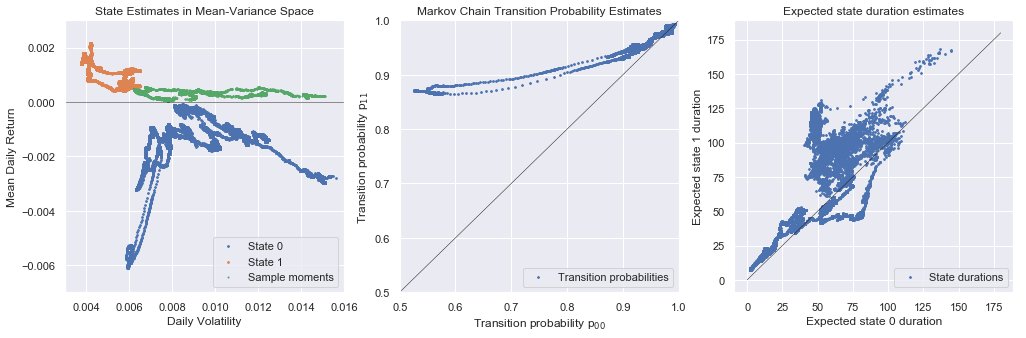

In [78]:
fig, axes = plt.subplots(1,3,figsize=[17,5])

axes[0].axhline(0, color='k', linewidth=0.5)
axes[0].set_ylim([-0.007,0.003])
axes[0].set_xlim([0.003,0.016])
axes[0].scatter(df_market[(hmm_name,'sigma2_0')]**0.5, df_market[(hmm_name,'mu_0')], s=3, label='State 0', rasterized=True)
axes[0].scatter(df_market[(hmm_name,'sigma2_1')]**0.5, df_market[(hmm_name,'mu_1')], s=3, label='State 1', rasterized=True)
axes[0].scatter(df_market[(moment_name,'var')]**0.5, df_market[(moment_name,'mean')], s=1, label='Sample moments', rasterized=True)
axes[0].set_xlabel('Daily Volatility')
axes[0].set_ylabel('Mean Daily Return')
axes[0].legend(loc='lower right')
axes[0].set_title('State Estimates in Mean-Variance Space')

axes[1].set_ylim([0.5,1])
axes[1].set_xlim([0.5,1])
axes[1].plot([0,1],[0,1], linewidth=0.5, color='k')
axes[1].scatter(df_market[(hmm_name,'p00')], 1-df_market[(hmm_name,'p10')], s=3, label='Transition probabilities', rasterized=True)
axes[1].set_xlabel('Transition probability p$_{00}$')
axes[1].set_ylabel('Transition probability p$_{11}$')
axes[1].legend(loc='lower right')
axes[1].set_title('Markov Chain Transition Probability Estimates')

#axes[2].set_ylim([0.5,1])
#axes[2].set_xlim([0.5,1])
axes[2].plot([0,180],[0,180], linewidth=0.5, color='k')
axes[2].scatter(1/(1-df_market[(hmm_name,'p00')]), 1/(df_market[(hmm_name,'p10')]), s=3, label='State durations', rasterized=True)
axes[2].set_xlabel('Expected state 0 duration')
axes[2].set_ylabel('Expected state 1 duration')
axes[2].legend(loc='lower right')
axes[2].set_title('Expected state duration estimates')

plt.show()

fig.savefig('windowEstimatesScatterPlot.pdf', format='pdf', dpi=200, bbox_inches='tight')

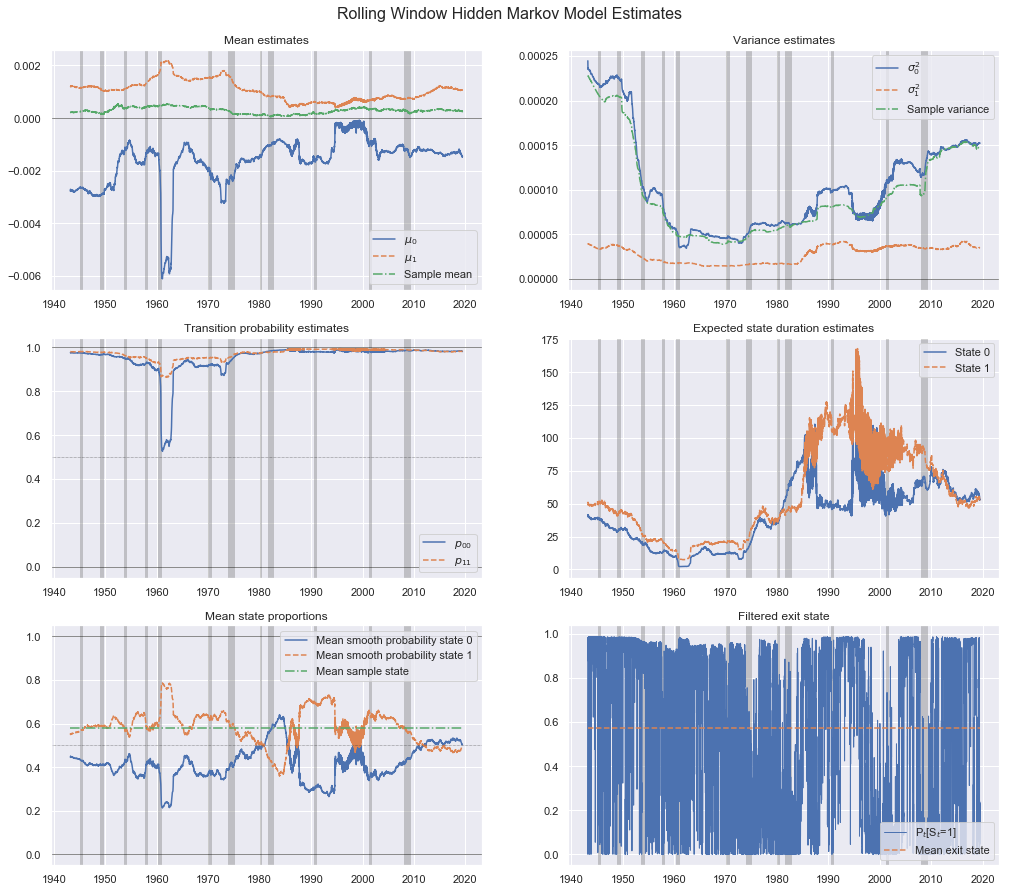

In [79]:
fig, axes = plt.subplots(3,2,figsize=[17,15])

axes[0,0].plot(df_market.loc[opt_dates][hmm_name,'mu_0'], label='$\mu_{0}$', rasterized=True)
axes[0,0].plot(df_market.loc[opt_dates][hmm_name,'mu_1'], label='$\mu_{1}$', linestyle='--', rasterized=True)
axes[0,0].plot(df_market.loc[opt_dates][moment_name,'mean'], label='Sample mean', linestyle='-.', rasterized=True)
axes[0,0].axhline(0, linewidth=0.5, color='k')
plot.add_recession_bars(axes[0,0], startdate=opt_dates[0])
axes[0,0].set_title('Mean estimates')
axes[0,0].legend()

axes[0,1].plot(df_market.loc[opt_dates][hmm_name,'sigma2_0'], label='$\sigma^2_{0}$', rasterized=True)
axes[0,1].plot(df_market.loc[opt_dates][hmm_name,'sigma2_1'], label='$\sigma^2_{1}$', linestyle='--', rasterized=True)
axes[0,1].plot(df_market.loc[opt_dates][moment_name,'var'], label='Sample variance', linestyle='-.', rasterized=True)
axes[0,1].axhline(0, linewidth=0.5, color='k')
plot.add_recession_bars(axes[0,1], startdate=opt_dates[0])
axes[0,1].set_title('Variance estimates')
axes[0,1].legend()

axes[1,0].plot(df_market.loc[opt_dates][hmm_name,'p00'], label='$p_{00}$', rasterized=True)
axes[1,0].plot(1-df_market.loc[opt_dates][hmm_name,'p10'], label='$p_{11}$', linestyle='--', rasterized=True)
axes[1,0].axhline(0, linewidth=0.5, color='k')
axes[1,0].axhline(1, linewidth=0.5, color='k')
axes[1,0].axhline(0.5, linewidth=0.5, color='k', linestyle=':')
plot.add_recession_bars(axes[1,0], startdate=opt_dates[0])
axes[1,0].set_title('Transition probability estimates')
axes[1,0].legend()

axes[1,1].plot(1/(1-df_market.loc[opt_dates][hmm_name,'p00']), label='State 0', rasterized=True)
axes[1,1].plot(1/(df_market.loc[opt_dates][hmm_name,'p10']), label='State 1', linestyle='--', rasterized=True)
plot.add_recession_bars(axes[1,1], startdate=opt_dates[0])
axes[1,1].set_title('Expected state duration estimates')
axes[1,1].legend()

axes[2,0].plot(df_market.loc[opt_dates][hmm_name,'mean_smooth_prob_0'], label='Mean smooth probability state 0', rasterized=True)
axes[2,0].plot(df_market.loc[opt_dates][hmm_name,'mean_smooth_prob_1'], label='Mean smooth probability state 1', linestyle='--', rasterized=True)
axes[2,0].plot([opt_dates[0],opt_dates[-1]],[df_market.loc[opt_dates][hmm_name,'mean_smooth_prob_1'].mean(),df_market.loc[opt_dates][hmm_name,'mean_smooth_prob_1'].mean()]
               , label='Mean sample state', linestyle='-.', rasterized=True)
axes[2,0].axhline(0, linewidth=0.5, color='k')
axes[2,0].axhline(1, linewidth=0.5, color='k')
axes[2,0].axhline(0.5, linewidth=0.5, color='k', linestyle=':')
plot.add_recession_bars(axes[2,0], startdate=opt_dates[0])
axes[2,0].set_title('Mean state proportions')
axes[2,0].legend()

axes[2,1].plot(df_market.loc[opt_dates][hmm_name,'filt_prob_1'], rasterized=True, linewidth=1, label='P$_t$[S$_t$=1]')
axes[2,1].plot([opt_dates[0],opt_dates[-1]],[df_market.loc[opt_dates][hmm_name,'filt_prob_1'].mean(),df_market.loc[opt_dates][hmm_name,'filt_prob_1'].mean()],
               linestyle='--', label='Mean exit state',  rasterized=True)
plot.add_recession_bars(axes[2,1], startdate=opt_dates[0])
axes[2,1].set_title('Filtered exit state')
axes[2,1].legend(loc='lower right')

#axes[2,1].plot(df_market.loc[opt_dates][hmm_name,'nobs'], rasterized=True)
#plot.add_recession_bars(axes[2,1], startdate=opt_dates[0])
#axes[2,1].set_title('Number of observations in '+str(win_yrs)+'-year window')

fig.suptitle('Rolling Window Hidden Markov Model Estimates', y=0.92, fontsize=16)

plt.show()

fig.savefig('windowEstimatesResultsPlot.pdf', format='pdf', dpi=200, bbox_inches='tight')